<img src='http://drive.google.com/uc?export=view&id=1UAsSD6z0wK4UJjjzBhDEIlSZnELLmeeb'>

# <font color='lightblue'>Answering Questions</font>

In this project you will use all you learnt about in the class to answer a question. Imagine you are part of a team and you have been assigned a question to answer, build a notebook that you would be able to share with your team that shows what you found. 

In this project you will:

1.  Introduce your question of interest
2.  Make sure your reader knows enough about the data
3.  Wrangle and preprocess your data so that a team mate can reproduce your work
4.  Build and test a model that can provide insight into your question
5.  Interpret your model results
6.  Answer your question



Note: Marks will be awarded for clarity, organization, and succinctness. I.e., try to point out only the important parts in a well-organized easy to follow manner. (Marks: 3)

## <font color='lightblue'>1. Ask a question </font>

**Q1**: Layout your question of interest. Remember to state your question as clearly and simply as you can (Mark 1), and what your ideal outcome would be (Marks 1).
<br>
<font color='green'> I am using the same dataset from Project 2 where I predicted Heart Disease with Fasting Blood Sugar. And for this project I am checking if Fasting Blood Sugar and other factors from the dataset causing Heart Disease. <br>
The ideal outcome is to see the coorelation between the chest pain, resting blood pressure, cholestrol and their effect on Heart Disease. 

**Q2**: Identify and describe what data sources you'll use (Marks 1). Make sure to talk about one of the following: data accuracy, reliability, validity, or sample selection. (Marks: 1)
<br>
<font color='green'>
==>I am using a dataset that provides the classification of heart disease provided by the Cleveland Clinic Foundation. This data contains
data on 13 potential predictors of heart disease, as well as the diagnosis received by the patient. Talking about the reliability the dataset only has data of 303 patient which might not be enough data to make the best prediction. The "target" field has 1 and 0 value which is not clear that if the patient died due to Heart Disease or if that refers to the presence of heart disease in the patient. Since we dont have a lot of information on the target field and looking at other columns, it is more logical to assume that 0 means that the patiend does has heart disease and 1 means the patient does have.
<br>

**Q3**: Layout what kind of ML problem you are facing and what kind of model you'll use to answer it (eg., is it unsupervised or supervised learning, and is it classification or regression). Make sure to say why. (Marks 1) 
<br>
<font color='green'> I am using heart disease dataset. Since, its labelled data and I am predicting the final outcome based of the factors of the patents data, it will be a supervised learning. It is a Classification Model and I will be using a Random Forest to build my model because I am predicting if the predictors on the patients will determine the cause of Heart Disease or not.

<font color="red"> Very well described! </font>

## <font color='lightblue'>2. Data understanding, exploration, and visualization </font>

**Action**: While above you gave an overview of the dataset(s) that will be used, here make sure that the reader understands the important details of the data. E.g., show a figure or descriptive statistic and explain why the reader should know about this, i.e., how will it help your reader understand your analysis? (Marks: 2)

In [ ]:
#Importinng the Models

import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [ ]:
# Importing the Data 
df_heart = pd.read_csv('/content/heart.csv')

#Display the data.
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### <font color='darkorange'>  Description of the Columns: </font>

<font color='darkorange'>
Age = Age of the people.<br>
Sex = 1: male || 0: female <br>
Cp = Chest pain type <br>
trestbps = Resting blood pressure (in mm Hg on admission to the hospital) <br>
chol = Serum cholestoral in mg/dl <br>
fbs = Fasting blood sugar > 120 mg/dl, 1: true || 0: false <br>
restecg = Resting electrocardiographic results <br>


* <font color='darkorange'>Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>

<font color='darkorange'>thalach = Maximum heart rate achieved <br>
exang = Exercise induced angina, 1:yes || 0: no <br>
oldpeak = ST depression induced by exercise relative to rest <br>
slope = The slope of the peak exercise ST segment <br>
*   <font color='darkorange'>Value 1: Upsloping
*   Value 2: Flat
*   Value 3: Downsloping <br>

<font color='darkorange'>ca = Number of major vessels (0-3) colored by flourosopy <br>
thal= 0 = normal || 1 = fixed defect || 2 = reversable defect <br>
traget - (1 = has disease|| 0 = does not have disease)
</div>

In [ ]:
#Determining the datatypes.
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
#Checking the detail information of the data.
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Checking for Null Values
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<font color='green'> ● Choosing Age from the dataset.
 </font>

In [ ]:
#Working on Age

#Cacluclating the mean
mean_age = (df_heart['age'].mean())

#Calculating the mode
mode_age = df_heart['age'].mode()[0]

#Calculating the median
median_age = df_heart['age'].median()

#Calculating the variance
std_age = df_heart['age'].std()

#Calculting the min and max Math Score 
age_min = df_heart['age'].min()
age_max = df_heart['age'].max()

print("The mean Age in the dataset is:- ", round(mean_age))
print("The most common Age is:- ", mode_age)
print("The middle most Age is:- ", median_age)
print("The standard deviation of Age is:- ", round(std_age))
print("The youngest Age is:- ", age_min)
print("The oldest Age is:- ", age_max)

The mean Age in the dataset is:-  54
The most common Age is:-  58
The middle most Age is:-  55.0
The standard deviation of Age is:-  9
The youngest Age is:-  29
The oldest Age is:-  77


In [ ]:
#Displaying Deatiled Summary Stasticts of all the Variable. 
df_heart.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


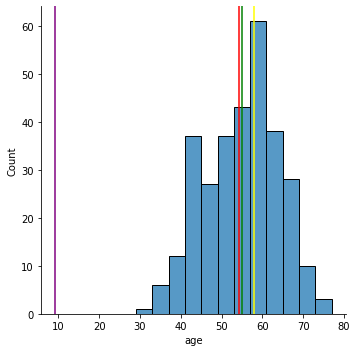

In [ ]:
#Creating a histogram of Age of people in the dataset. 

sns.displot(df_heart, x='age')
plt.axvline(mean_age,color="red")
plt.axvline(mode_age,color="yellow")
plt.axvline(median_age,color="green")
plt.axvline(std_age,color="purple")

#Save the plot.
plt.savefig('hist_compare.png')

<font color='green'> The above histogram shows that, the data was focused on the people who are above the age 28. 



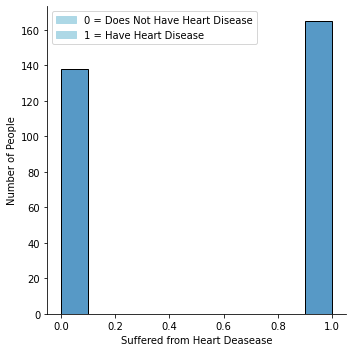

In [ ]:
# Creating a histogram to check the survival.
sns.displot(data=df_heart, x='target')
plt.ylabel('Number of People')
plt.xlabel('Suffered from Heart Deasease')

# Making a legend to make easier to read.
colors = {'0 = Does Not Have Heart Disease':'Lightblue', '1 = Have Heart Disease':'Lightblue'}        
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),60,60, color = colors[label]) for label in labels]
plt.legend(handles, labels)

<font color='green'>  The above histogram shows that the number of people who has suffered from the heart disease is higher than the number of people who does not. </font>

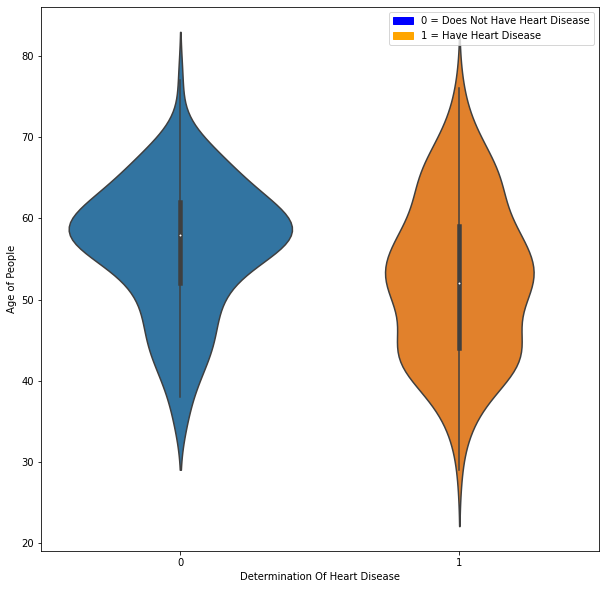

In [ ]:
# Creating a histogram to check the survival.
sns.violinplot(data=df_heart, x='target', y='age')
plt.ylabel('Age of People')
plt.xlabel('Determination Of Heart Disease')

# Making a legend to make easier to read.
colors = {'0 = Does Not Have Heart Disease':'Blue', '1 = Have Heart Disease':'Orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color = colors[label]) for label in labels]
plt.legend(handles, labels)

<font color='green'>Above violion plot showed that people haveing Heart Diesase has the high desnity violion. Now lets find out what age of people are suffering more from Heart Disease.
</font>


Text(0.5, 1.0, 'Different age of people who suffered due to heart desease.')

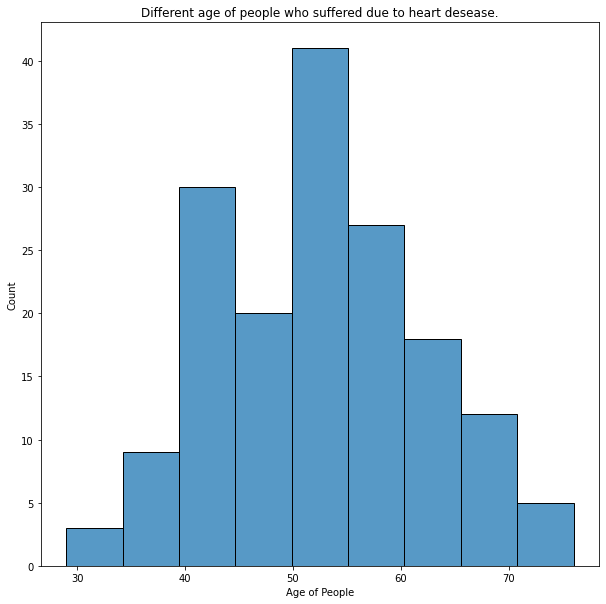

In [ ]:
# Creating a histogram to check the heart disease count.
has_disease = df_heart['age'].where(df_heart['target'] == 1)
plt.xlabel('Age of People')

# Displaying the graph.
sns.histplot(has_disease)
plt.title('Different age of people who suffered due to heart desease.')

<font color='green'> From the above diagram we can see that the age of people between 50 to 55 has the highest heart disease count. Now lets find out what gender has the highest Heart Disease counts.

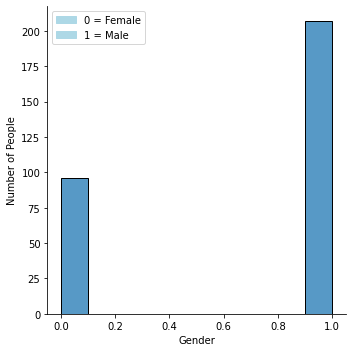

In [ ]:
# Creating a histogram to check the survival.
sns.displot(data=df_heart, x='sex')
plt.ylabel('Number of People')
plt.xlabel('Gender')

# Making a legend to make easier to read.
colors = {'0 = Female':'Lightblue', '1 = Male':'Lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),60,60, color = colors[label]) for label in labels]
plt.legend(handles, labels)

<font color='green'> The above graph shows that the number of Male suffering from Heart Desease is double than the number of Female.




**Using correlation to estimate the relationship between some of the key variables.** 

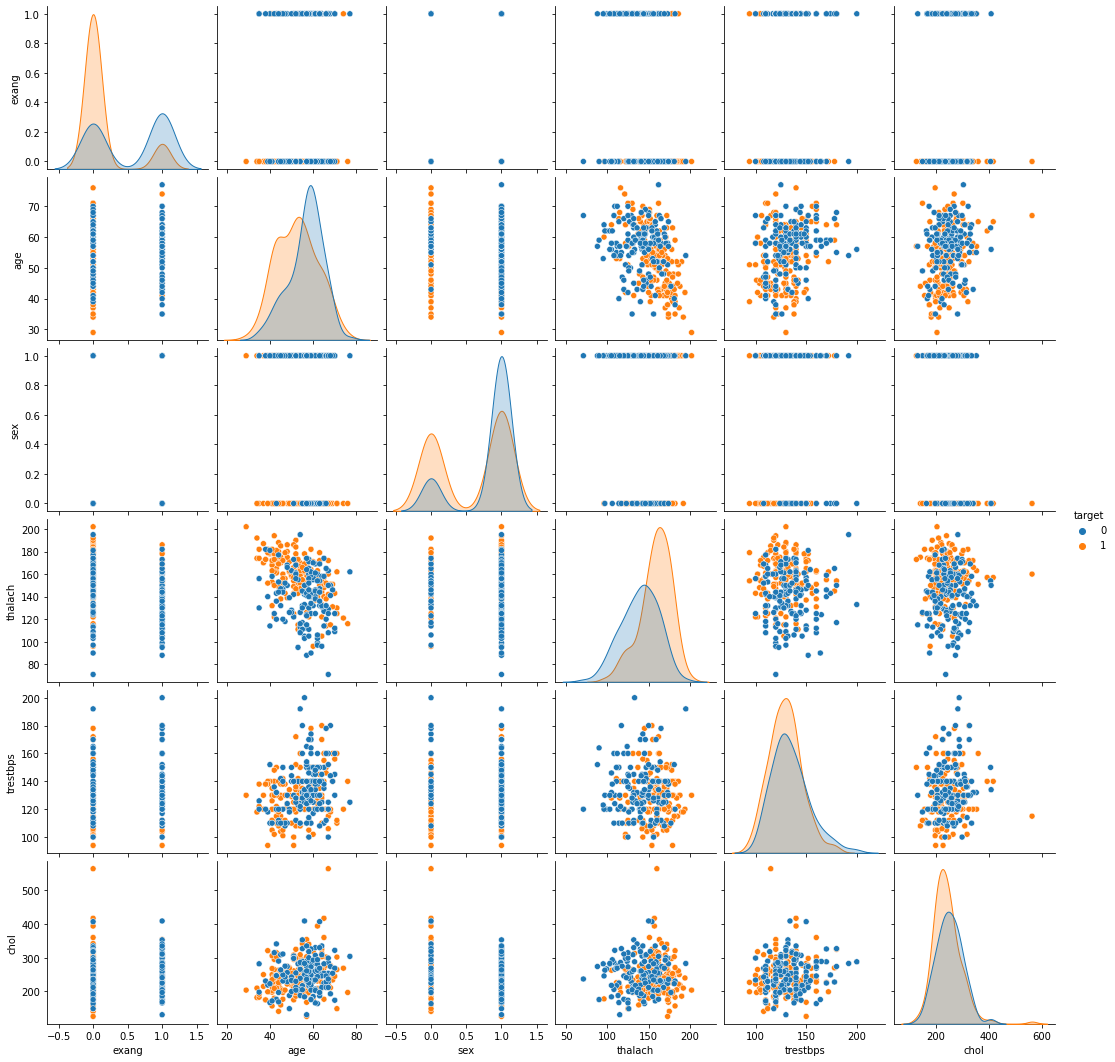

In [ ]:
#Choosing scores of all Subjects as our variables
df_heart_pairs = df_heart[["exang", "target", "age", "sex", "thalach", "trestbps",	"chol"]] 

#using the pairplot method to look at all combinations of those variables.
sns.pairplot(df_heart_pairs, hue = "target")

<font color='green'> 
</br> 
• If we look at the pair plot, the graph of exang and sex we can see that the people who did not do exercise has got a heart disease whereas the people who did exercise has a very low heart disease count.
</br>


<font color='green'> 
</br>
• If we look at the graph of thalach and sex we can see that the people with a Maximum heart rate achieved of over 140 are more likely to have heart disease.
<br>

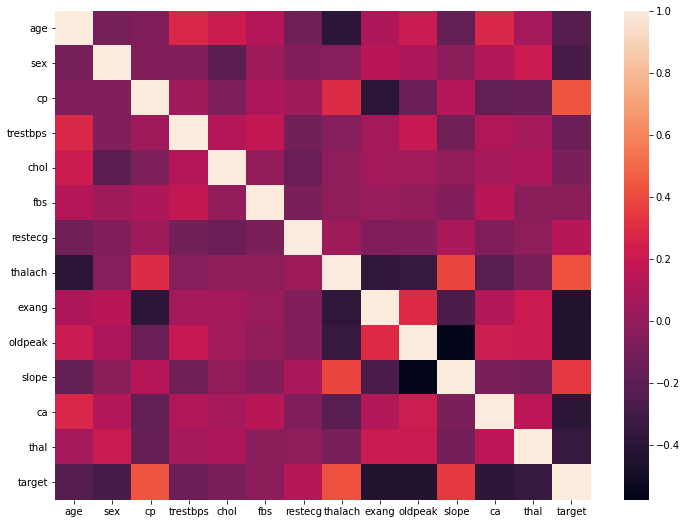

In [ ]:
 # Calculating the correlations between each variable
df_heart_corr = df_heart.corr()

# Plotting the correlations in a heat map (hotter = higher correlation)
plt.subplots(figsize=(12,9))
sns.heatmap(df_heart_corr, square=False)

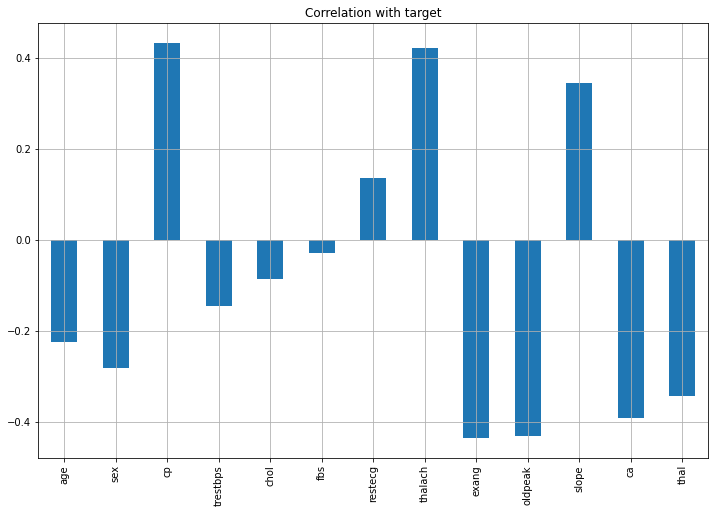

In [ ]:
df_heart.drop('target', axis=1).corrwith(df_heart.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

<font color='green'> 
<br>

• As the pair plot does not give a lot of visualization or corelations between variables. We used heatmap ad we can see that chest pain (cp), maximum heart rate achieved (thalach) and slope have a positive corrolation with target, while exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), number of major vessels colored by flourosopy (ca) and thalasemia (thal) have a negative corrolation.
</font>


## <font color='lightblue'>3. Data wrangling and preprocessing </font>

**Action**: Layout all your data wrangling and preprocessing steps so that a reader will understand why you took each step, and would be able to reproduce your steps. (Marks: 3)

<font color='green'> I need to apply preprocessing steps. I used all categorical columns from my dataset because the results is a categorial value where 0 means normal, 1 means fixed defect and  2 is reversable defect. If i preprocess the column it will be in the proper data needed which will make it easy to solve or visualize a particular problem. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of features you'd like to turn into 0/1
bin_names = ['target']

#create a dataframe of those features
bin_features = df_heart[bin_names]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_heart[bin_names] = bin_features

#take a look
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0.0


<font color='green'>Here we converted the target column into 0/1, even though it was already in Binary Variables, it is a good practice to know how to change the Binary Variables into 0/1.

In [ ]:
# Categorical variables in the columns.
cat_names = ['cp', 'restecg', 'slope', 'ca',  'thal']

# Creating dummy variables.
df_cat = pd.get_dummies(df_heart, columns = cat_names)

# Adding them back to the original dataframe.
df_heart = pd.concat([df_heart, df_cat], axis=1)

# Removing the old columns.
df_heart = df_heart.drop(cat_names, axis=1)

# Displaying the data.
df_heart

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,age,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1.0,63,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1.0,37,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1.0,41,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1.0,56,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1.0,57,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0.0,57,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0.0,45,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0.0,68,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0.0,57,...,0,0,1,0,0,0,0,0,0,1


<font color='green'>In the above data table we can see that we have converted all the categorical columns into 0/1 format and also we can see now we have 23 new columns with the name like thal_0, thal_1, thal_2 and thal_3.
<br>
We got 37 columns and it doesnot seem right. So lets see what extra columns we got.

In [ ]:
df_heart.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0',
       'restecg_1', 'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

<font color='green'>If we look at the columns, we see that 'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', and 'target', has been duplicated. So lets fix the issue.

In [ ]:
df_heart = df_heart.T.drop_duplicates().T
df_heart.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'restecg_0', 'restecg_1',
       'restecg_2', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2',
       'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

<font color='green'> Now its looks good to go for splitting.

**Splitting the data into training and testing datasets.** 

In [ ]:
# Splitting the data into training and testing (80/20 split)

#split data into predictors (X) and target (y)
X = df_heart.drop('target', axis=1)
y = df_heart['target']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Scaling the numeric variables.** 

In [ ]:
# Feature Scaling (after spliting the data!)
from sklearn.preprocessing import StandardScaler 

# Numeric variables
numb_names = X_train.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak'],axis=1).select_dtypes('number').columns.tolist()

# Creating the standard scaler object
sc = StandardScaler()

# Using this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data.
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

# Using the fit from the training data to transform the test data.
X_test[numb_names] = sc.transform(X_test[numb_names])

## <font color='lightblue'>4. Build and test a model</font>



**Action:** Use your training dataset to build a model with the goal addressing your question of interest. (Marks: 2)

<font color='green'>We are using Random Forest for predicting our target variable.

In [ ]:
# Lets define what parameters and what values to vary.
parameters = {'max_features': [0.5,0.7,0.9,1.0],
              'n_estimators':list(range(50,200,50)),
              'max_samples':[0.5,0.7,0.9,0.99] }

# Building the grid search algorithm.
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='accuracy')

# Using training data to perform the nfold cross validation.
grid_search.fit(X_train, y_train)

# Finding the best hyperparameters.
print(grid_search.best_params_)
grid_search.best_score_

{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}


0.7974489795918367

In [ ]:
#1. Building an optimized model.
forest_classifier_opt = RandomForestClassifier(n_estimators=150,max_samples=0.5, max_features=1)

#2. Fitting the model to the data
forest_classifier_opt.fit(X_train, y_train)

#3. Make predictions
y_forest_pred_opt = forest_classifier_opt.predict(X_test)

# Measure accuracy
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(y_test, y_forest_pred_opt)))

Accuracy: 0.90


**Q4**: Measure the performance of your model, and describe how well your model generalizes to new data (Marks: 2)

<font color='green'> **To measure the performance of our model we will be using Confusion Matrix.**

Text(69.0, 0.5, 'True label')

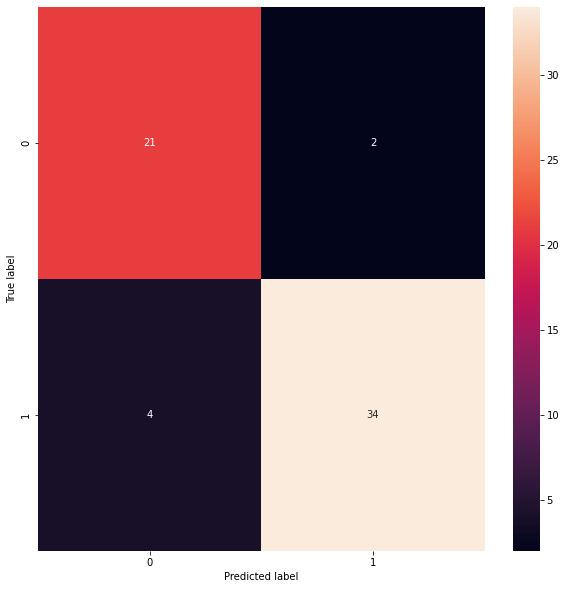

In [ ]:
# Calculate a confusion matrix
cm_forest_opt = confusion_matrix(y_test, y_forest_pred_opt)

#Plot the confusion matrix
sns.heatmap(cm_forest_opt, annot=True)
plt.xlabel('Predicted label')
plt.ylabel('True label')

<font color='green'> In the above confusion matrix, it shows that we got total 49 right predictions where there were 34 (True Positive) and 21 (True Negative) and we also got 2(False Positive) and 4(False Negative).

<font color='green'> Type 1 error : 2 which is when people were not actually having heart disease but model predicted they have.

<font color='green'>Type 2 error : 4 which is when people were actually having heart disease but model predicted they have not.

<font color="red">Nicely done!</font>

## <font color='lightblue'>5. Interpret your model</font>

In [ ]:
from sklearn.inspection import permutation_importance

# Using permutation importance.
perm_result = permutation_importance(forest_classifier_opt, X=X_test, y=y_test, scoring='accuracy', n_repeats=30)

# Placing values into a dataframe.
forest_importances = pd.DataFrame({'variable':X_test.columns,'impo':perm_result.importances_mean.round(4), "sd":perm_result.importances_std.round(4)})

# Sorting the dataframe.
forest_importances.sort_values(by='impo', ascending=False)

,variable,impo,sd
18,ca_0,0.0585,0.0193
8,cp_0,0.0536,0.0174
17,slope_2,0.0530,0.0231
7,oldpeak,0.0393,0.0167
25,thal_2,0.0339,0.0189
5,thalach,0.0317,0.0211
21,ca_3,0.0311,0.0088
10,cp_2,0.0301,0.0180
6,exang,0.0295,0.0166
19,ca_1,0.0213,0.0105


<font color='green'>From the table we can see that the interaction between those variable affects the predictive ability of the model. In the importance column we can see that CP0, ca, slope, thalach and exang has the high importance value whereas ca_4 and thal_0 has the low importance value in predicting model.

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]),
 <a list of 8 Text major ticklabel objects>)

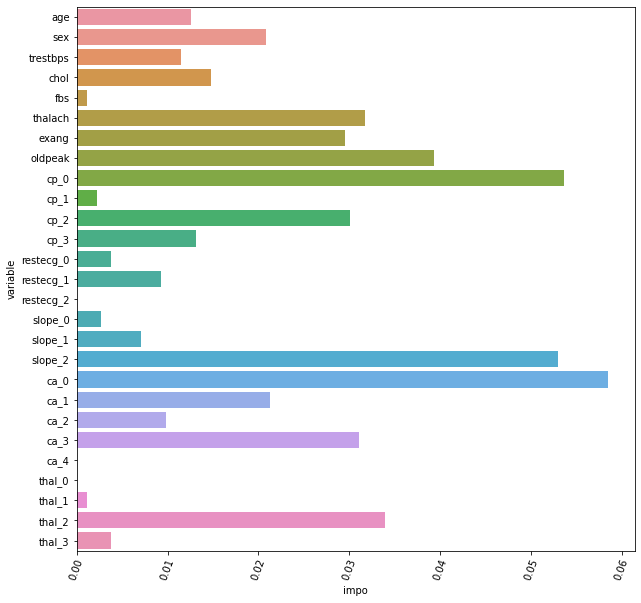

In [ ]:
# Plotting the importance.
plt.rcParams["figure.figsize"] = (10, 10)
sns.barplot(data=forest_importances, x='impo',y='variable')
plt.xticks(rotation=70)

<font color='green'>From the above barplot we can see that the model is not using just one Variable to predict everything. All the varibale had effect on the prediction whereas Chest Pain Type 0 has the most effect and Thalassemia of type 0 has the lest effect or we can say no effect. 

<font color="red">Very good interpretations!</font>

## <font color='lightblue'>6. Answer your question</font>

**Q6:** Use your analysis above to answer your question of interest. Did you achieve your desired outcome, and what might the next steps be? Remember to write as though you are writing to team mates working on the same/similar problem. (Marks: 3)
<br>
<font color='green'>
==> As my question was if Fasting Blood Sugar and other factors from the dataset causing the patient Heart Disease? And from the Model we found out that CP0, ca, thalach and exang have a high effect on predicting heart disease. The model had 90% accuracy and looking at the interepretion model it make sense because chest pain, chest tightness, chest pressure and chest discomfort is a major symptom of heart disease. thalach (Maximum heart rate) had a very high effect on the prediction factor which is true and if we look back to the visuazation part we found people with Maximum Heart rate greater than 140 were having a very high chance of Heart Disease. Other factor was exang which means if the patient did execrise and and if we go back at our visualiztion part we made a scatter plot graph where we found out that people who did exercise had a very low chances of having a heart disease compared to the one who didnot. Others important varible were ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flourosopy and so on.
<br>
<br>
The interesting thing I got here was fbs (Fasting Blood Sugar) which had a very less effect on the prediction because when I used logistic regression I got fbs to be one of the factor with high effect. Also the accuracy was lower than what I have now with Random forest. I tried running again and again to see if I could a different result where I could get more accurate and logical result this was the best one with more meaningful prediction except for fbs. Although I did not show did in this notebook, varying the test/train ratio resulted different performance metrics for the classifiers we have. So the other thing that I found was if we change the ratio we might get different results.
<br>
<br>
Since we have a high accurate model with meaningful interpretation my next step might be building a system for End-User where it takes inputs from the user and predicts to dectect Heart Disease in Patients.


Note: It is ok if your analysis doesn't provide a strong answer, you can point out where it failed. If anything you can cross the approach you took off the list of possible ways to tackle your question. I.e., you still made progress!

<font color="red">Very good points! It is a common thing with small datasets that if we change the size of the splits, or even when we simply randomly split again, we'll get different results. How much it changes can often tell us something about how consistent the pattern the model has found, and if we can trust the model on new data.

I like the idea of building a system for End-User!! 
21/21</font>

<font color='red'> Please Ignore this part. 

I think we might need more information and knowledge about python is required to build the module that I am trying to do.  

In [ ]:
# userData = [56, 1, 105, 140, 115, 140, 1,  2.8, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

# if forest_classifier_opt.predict([userData]) == 0:
#     print("Heart Disease not detected.")
# else:
#     print('Heart Disease detected.')

Heart Disease detected.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
